

### Assignment 2 - Linear Regression


#### Problem Statement :

Using numpy, Implement Linear regression using gradient descent

(You can’t use scikit-learn)

Scoring Points -

Explain what a cost function is.

understanding of derivatives.

Should be able to explain the effects of having different learning rates.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import matplotlib

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)

In [30]:
df = pd.read_csv('data.csv')
df.head()

32.502345269453031  31.70700584656992
0           53.426804          68.777596
1           61.530358          62.562382
2           47.475640          71.546632
3           59.813208          87.230925
4           55.142188          78.211518

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
32.502345269453031    99 non-null float64
31.70700584656992     99 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [32]:
data = np.loadtxt('data.csv', delimiter =',')
data.shape

(100, 2)

In [33]:
max = data.max(axis = 0)
min = data.min(axis = 0) 
data = (data - min)/ (max - min)
print(max)
print(min)

[ 70.34607562 118.5912173 ]
[25.12848465 31.70700585]


In [34]:
def data_split(data, test_size_, seed_ = 3):

    sequence = [i for i in range(data.shape[0])]
    random.seed(seed_)
    random.shuffle(sequence)
    test_sequence = sequence[:test_size_]
    train_sequence = sequence[test_size_:]

    train_x = data[train_sequence,0]
    train_y = data[train_sequence,1]
    test_x = data[test_sequence,0]
    test_y = data[test_sequence,1]

    figure, axis = plt.subplots(1, 2, figsize=(20, 8), dpi=80)

    axis[0].scatter(train_x, train_y, c= 'r', label ='Train_split')
    axis[0].scatter(test_x, test_y, c= 'b', label ='Test_split')
    axis[0].set_title('Split Data')
    axis[0].legend()


    axis[1].scatter(data[:,0], data[:,1], label ='Real')
    axis[1].set_title('Actutal data')
    axis[1].legend()

    plt.show()
    
    train_x = np.concatenate(
    (train_x[:,np.newaxis], np.ones((train_x.shape[0],1))) 
    , axis = 1)
    
    test_x = np.concatenate(
    (test_x[:,np.newaxis], np.ones((test_x.shape[0],1))) 
    , axis = 1)
    
    return train_x, train_y[:,np.newaxis], test_x, test_y[:,np.newaxis]
    
    

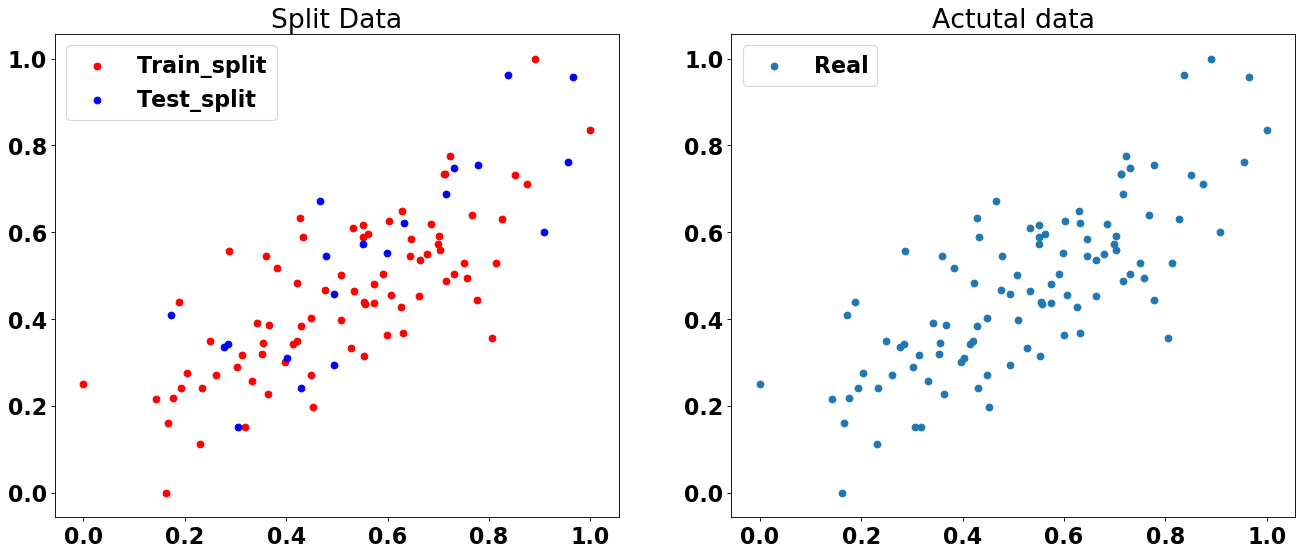

In [35]:
train_x, train_y, test_x, test_y = data_split(data, test_size_ = int( 0.2*data.shape[0]), seed_ = 21)

In [36]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_x.shape)

(80, 2)
(80, 1)
(20, 2)
(20, 2)


In [37]:
def compute_forward_pass(X,W):
    h = np.dot(X , W.T)
    return h

def compute_cost(h,y):
    m = y.shape[0]
    error = float(np.sum(
        (y - h)**2,
        axis = 0
    ).ravel())
    return (1/(2*m))*error

## Explain Cost Function - 

This is the cost function which lets us figure out how to fit the best straight line in out data. Cost function helps to measure the performance of a ML model for the given data. It calculates the difference between the predicted values and the expected values and gives a single real number as the output.

#### "compute_forward_pass"  function - 
We first calculate the a function known as hypothesis function which is the output of the regression alogorithm. The compute_forward_pass outputs this hypothesis.

We represent hypothesis as, 
    h(x) = b + wx = x*w + 1*b  = [1, x] * [b, w].T = np.dot(X, W.T) 
    
where
    
    w = the coefficient parameter or weight of the linear model.
    b = the constant or bias
    x = input variable/ parameter 
    h = hypothesis = the estimate value of target calculated by regression model.
    X = input matrix ( bias concatenated with feature vector )
    y = output vector ( "target" variables )

Therefore, this function takes some input x variable, then uses the parameter determined by a regression model and finally outputs a prediction vector based on that input also know as hypothesis (h) and returns its value
    
#### "compute_cost" function - 

Mean square Error loss Function is implemented as cost function which can be written as :

J = (1/(2*m)) * (summation (h(x_i) - y_i)**2)

h(x_i) = b + w*x_i

where, 

    J = cost functiuon
    x_i = ith input training example
    y_i = ith target training example
    h = hypothesis function
    b= bias
    w = parameter /weight
    m = number of training examples
    
    * Here we want to solve the minimization problem.
    * Minimize (h(x_i) - y_i)**2  - We have to minimize the difference between h(x) and y for each example.
    * Then sum this over the training set.
    * Dividing by 1/2m helps to determines the average score.
    * Therefore, we want to determine values of w and b which make the hypothesis as accurate as possible


In [38]:
def init_weight(a, b):
    return np.ones((a,b))

def compute_grad(X,h,y):
    m = y.shape[0]
    dW = np.transpose((np.dot(X.T, (h - y))) *(1/m))
    return dW

def update_grad(w,dw, lr):
    return w - lr*dw

def train_model( lr, n_epochs = 200):
    train_loss = []
    val_loss = []
    callback_count = 10
    w = init_weight(1,2) 
    for epoch in range(n_epochs):
        h = compute_forward_pass(train_x, w)
        j_train = compute_cost(h, train_y)
        train_loss.append(j_train)

        h_val = compute_forward_pass(test_x, w)
        j_val = compute_cost(h_val, test_y)
        val_loss.append(j_val)
        
        
        dw = compute_grad(train_x, h, train_y)
        w = update_grad(w,dw, lr)
        
        if(j_val > j_train):
            callback_count -= 1
            if(callback_count == -1):
                print("Learning Rate: {l} Epoch needed : {e}  Training Loss: {tl}  Validation Loss:{vl} ".format(l = lr,e = epoch + 1, tl = j_train, vl = j_val))
    return (train_loss, val_loss), w